<a href="https://colab.research.google.com/github/tbeucler/2022_ML_Earth_Env_Sci/blob/main/Lab_Notebooks/S1_6_Cartopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

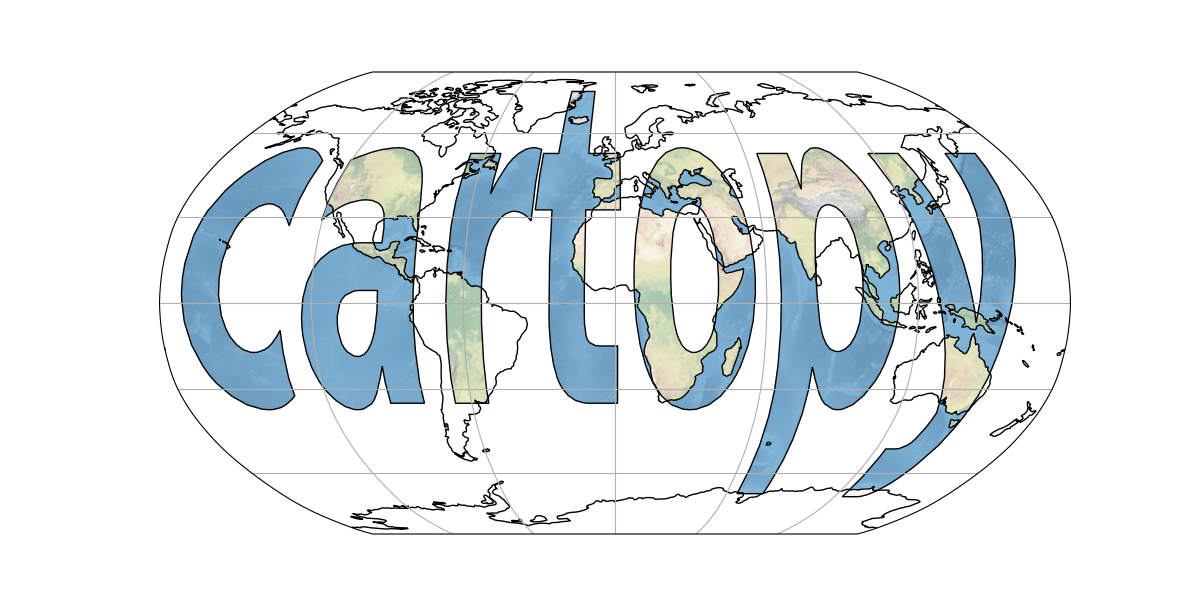

Making maps is a fundamental part of geoscience research. Maps differ from regular figures in the following principle ways:

*    Maps require a *projection* of geographic coordinates on the 3D Earth to the 2D space of your figure.

*    Maps often include extra decorations besides just our data (e.g. continents, country borders, etc.)

Mapping is a notoriously hard and complicated problem, mostly due to the complexities of projection.

In this lecture, we will learn about [Cartopy](https://scitools.org.uk/cartopy/docs/latest/), one of the most common packages for making maps within python. Another popular and powerful library is [Basemap](https://matplotlib.org/basemap/); however, Basemap is [going away](https://matplotlib.org/basemap/users/intro.html#cartopy-new-management-and-eol-announcement) and being replaced with Cartopy in the near future. For this reason, new python learners are recommended to learn Cartopy.

A lot of the material in this lesson was adopted from [Phil Elson](https://pelson.github.io/)’s excellent [Cartopy Tutorial](https://github.com/SciTools/cartopy-tutorial). Phil is the creator of Cartopy and published his tutorial under an [open license](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/). 

# Background: Projections

## Most of our media for visualization *are* flat

Our two most common media are flat:

*    Paper

*    Screen

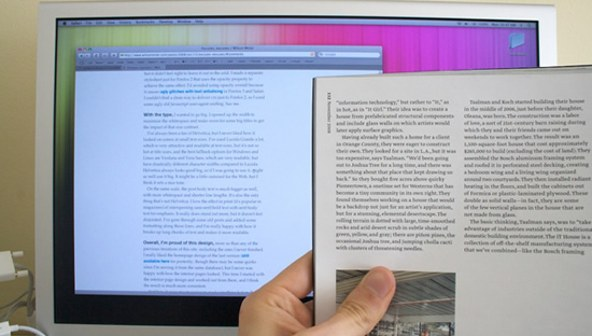

## (Map) Projections: Taking us from spherical to flat

A map projection (or more commonly refered to as just “projection”) is:

["A systematic transformation of the latitudes and longitudes of locations from the surface of a sphere or an ellipsoid into locations on a plane."](https://en.wikipedia.org/wiki/Map_projection)

## The major problem with map projections

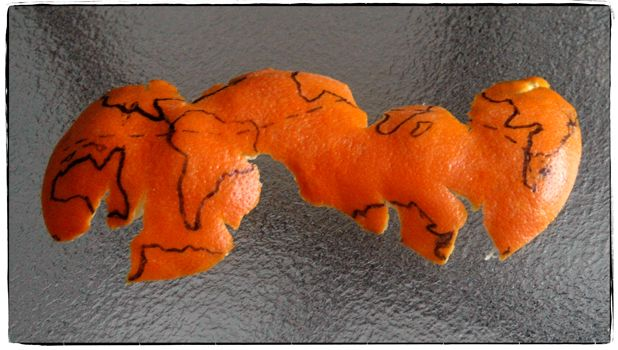

*    The surface of a sphere is topologically different to a 2D surface, therefore we *have* to cut the sphere *somewhere*

*    A sphere’s surface cannot be represented on a plane without distortion.

There are many different ways to make a projection, and we will not attempt to explain all of the choices and tradeoffs here. Instead, you can read Phil’s [original tutorial](https://github.com/SciTools/cartopy-tutorial/blob/master/tutorial/projections_crs_and_terms.ipynb) for a great overview of this topic. In this notebook, we will dive into the more practical sides of Cartopy usage.

# Introducing Cartopy

[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) makes use of the powerful [PROJ](https://proj.org/), [numpy](https://numpy.org/doc/) and [shapely](https://shapely.readthedocs.io/en/stable/manual.html) libraries and includes a programatic interface built on top of [matplotlib](https://matplotlib.org/stable/) for the creation of publication quality maps.

Key features of cartopy are its object oriented projection definitions, and its ability to transform points, lines, vectors, polygons and images between those projections.

## Cartopy Projections and Other Reference Systems

In Cartopy, each projection is a class. Most classes of projection can be configured in projection-specific ways, although Cartopy takes an opinionated stance on sensible defaults.

Let’s create a `Plate Carree` projection instance.

To do so, we need cartopy’s `crs` module. This is typically imported as `ccrs` (Cartopy Coordinate Reference Systems).

But first, let's install `cartopy` to use it in this Google Colab notebook! We have to [first install `shapely` without binary](https://github.com/SciTools/cartopy/issues/1490) to avoid crashing the entire Google Colab notebook.

In [ ]:
pip install --no-binary 'shapely==1.6.4' 'shapely==1.6.4' --force

In [ ]:
pip install git+https://github.com/SciTools/cartopy.git # Install latest version of cartopy

In [ ]:
import cartopy.crs as ccrs
import cartopy

Cartopy’s projection list tells us that the `Plate Carree` [projection](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html) is available with the `ccrs.PlateCarree` class:

**Note**: we need to instantiate the class in order to do anything related to projections with it!

In [ ]:
ccrs.PlateCarree()

## Drawing a map

Cartopy optionally depends upon matplotlib, and each projection knows how to create a matplotlib Axes (or AxesSubplot) that can represent itself.

The Axes that the projection creates is a [cartopy.mpl.geoaxes.GeoAxes](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html). This Axes subclass overrides some of matplotlib’s existing methods, and adds a number of extremely useful ones for drawing maps.

We’ll go back and look at those methods shortly, but first, let’s actually see the cartopy+matplotlib dance in action:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.axes(projection=ccrs.PlateCarree())

That was a little underwhelming, but we can see that the Axes created is indeed one of those GeoAxes[Subplot] instances.

One of the most useful methods that this class adds on top of the standard matplotlib Axes class is the `coastlines` method. With no arguments, it will add the Natural Earth `1:110,000,000` scale coastline data to the map.

In [ ]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

We could just as equally created a matplotlib subplot with one of the many approaches that exist. For example, the `plt.subplots` function could be used:

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

Projection classes have options we can use to customize the map

In [ ]:
ccrs.PlateCarree?

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines() 

## Useful Methods of a GeoAxes

The [cartopy.mpl.geoaxes.GeoAxes](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html) class adds a number of useful methods.

Let’s take a look at:

*    [set_global](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html?highlight=set_global#cartopy.mpl.geoaxes.GeoAxes.set_global) - zoom the map out as much as possible

*    [set_extent](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html?highlight=set_global#cartopy.mpl.geoaxes.GeoAxes.set_extent) - zoom the map to the given bounding box

*    [gridlines](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html?highlight=set_global#cartopy.mpl.geoaxes.GeoAxes.gridlines) - add gridlines (and optionally labels) to the axes

*    [coastlines](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html?highlight=set_global#cartopy.mpl.geoaxes.GeoAxes.coastlines) - add Natural Earth coastlines to the axes

*    [stock_img](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html?highlight=set_global#cartopy.mpl.geoaxes.GeoAxes.stock_img) - add a low-resolution Natural Earth background image to the axes

*    [imshow](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html?highlight=set_global#cartopy.mpl.geoaxes.GeoAxes.imshow) - add an image (numpy array) to the axes

*    [add_geometries](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html?highlight=set_global#cartopy.mpl.geoaxes.GeoAxes.add_geometries) - add a collection of geometries (Shapely) to the axes

## Some More Examples of Different Global Projections

In [ ]:
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine()
              ]


for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

## Regional Maps

To create a regional map, we use the `set_extent` method of GeoAxis to limit the size of the region.

In [ ]:
ax.set_extent?

In [ ]:
central_lon, central_lat = -10, 45
extent = [-40, 20, 30, 60]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')

# Adding Features to the Map

To give our map more styles and details, we add `cartopy.feature` objects. Many useful features are built in. These “default features” are at coarse (110m) resolution.

| **Name**      | **Description** |
| ------------------------- | --------------- |
| `cartopy.feature.BORDERS`      | Country boundaries       |
| `cartopy.feature.COASTLINE`   | Coastline, including major islands        |
| `cartopy.feature.LAKES`      | Natural and artificial lakes       |
| `cartopy.feature.LAND`   | Land polygons, including major islands        |
| `cartopy.feature.OCEAN`      | Ocean polygons       |
| `cartopy.feature.RIVERS`   | Single-line drainages, including lake centerlines        |

Below we illustrate these features in a customized map of North America.

In [ ]:
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()

If we want higher-resolution features, Cartopy can automatically download and create them from the [Natural Earth Data database](http://www.naturalearthdata.com/) or the [GSHHS dataset](https://www.ngdc.noaa.gov/mgg/shorelines/gshhs.html) database.

In [ ]:
rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')
ax.gridlines()

# Adding Data to the Map

Now that we know how to create a map, let’s add our data to it! That’s the whole point.

Because our map is a matplotlib axis, we can use all the familiar maptplotlib commands to make plots. By default, the map extent will be adjusted to match the data. We can override this with the `.set_global` or `.set_extent` commands.

In [ ]:
# create some test data
new_york = dict(lon=-74.0060, lat=40.7128)
honolulu = dict(lon=-157.8583, lat=21.3069)
lons = [new_york['lon'], honolulu['lon']]
lats = [new_york['lat'], honolulu['lat']]

**Key point**: the data also have to be transformed to the projection space. 

This is done via the `transform=` keyword in the plotting method. The argument is another `cartopy.crs` object. If you don’t specify a transform, Cartopy assume that the data is using the same projection as the underlying GeoAxis.

From the [Cartopy Documentation](https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html):

"The core concept is that the projection of your axes is independent of the coordinate system your data is defined in. The `projection` argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The `transform` argument to plotting functions tells Cartopy what coordinate system your data are defined in."

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line')
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic())
ax.coastlines()
ax.legend()
ax.set_global()

## Plotting 2D (Raster) Data

The same principles apply to 2D data. Below we create some example data defined in regular lat / lon coordinates.

In [ ]:
import numpy as np
lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
plt.contourf(lon2d, lat2d, data)

Now we create a `PlateCarree` projection and plot the data on it without any `transform` keyword. This happens to work because `PlateCarree` is the simplest projection of lat / lon data.

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

However, if we try the same thing with a different projection, we get the wrong result.

In [ ]:
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

To fix this, we need to pass the correct transform argument to `contourf`:

In [ ]:
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

## Showing Images

We can plot a satellite image easily on a map if we know its extent

In [ ]:
! wget https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg

In [ ]:
fig = plt.figure(figsize=(8, 12))

# this is from the cartopy docs
fname = 'Miriam.A2012270.2050.2km.jpg'
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

# Xarray Integration

Cartopy transforms can be passed to `xarray`! This creates a very quick path for creating professional looking maps from netCDF data.

In [ ]:
import xarray as xr
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url, drop_variables=['time_bnds'])
ds

In [ ]:
sst = ds.sst.sel(time='2000-01-01', method='nearest')
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
sst.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=2, vmax=30, cbar_kwargs={'shrink': 0.4})

# Doing More

Browse the [Cartopy Gallery](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html) to learn about all the different types of data and plotting methods available!

# Bonus Exercise 2: Making Maps with Cartopy

The goal of this second bonus exercise (congratulations for making it that far!!) is to replicate the figures you see as closely as possible.

## Part I: Antarctic Sea Ice

**Q1) Download the file below and use it to plot the concentration of Antarctic Sea Ice on Aug. 7, 2017.** 

Hint: Explore the file contents in order to determine the correct projection.

In [ ]:
import pooch
url = "ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/south/daily/2017/seaice_conc_daily_sh_f17_20170807_v03r01.nc"
fname = pooch.retrieve(url, known_hash=None)

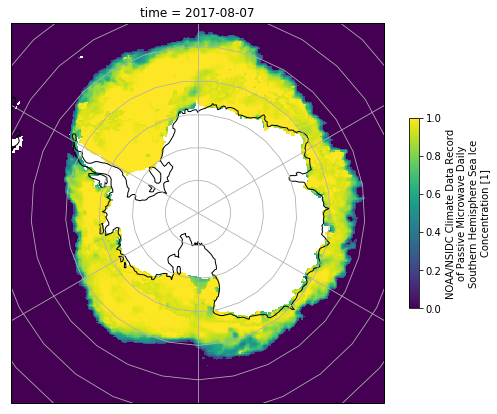

## Part II: Global Earthquake Map

Reload the file we explored in `S1_4_Pandas` using `Pandas`:

```
http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv
```

and use the data to recreate the map below with `cartopy`:

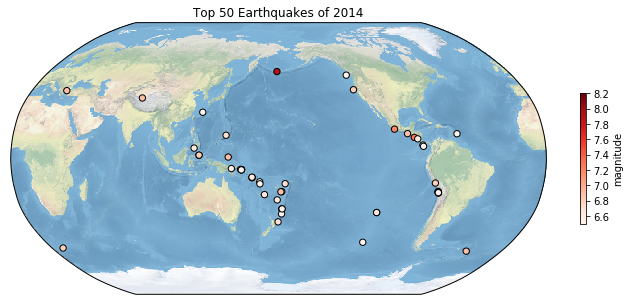